# Wine Points Prediction
Prepared By: </br>
    Latoya Clarke - 1400181,
    </br>
    Daniella Mcalla - 1502562,
    Mardon Bailey - 1300097

## Scenario:
Roger Voss is  a famous master sommelier,  european editor at Wine Enthusiast and author of many books about wine.  **Wine Merchants** is a local wine retailer in France. They realized a trend in their wine sales. This trend shows that the higher the wine scores given by Mr. Roger Voss, the higher the sales of the wine. Wine Merchants wants to expand their wine offerings but are unsure of how these other wines would perform (in sales). Wine Merchant now wants to predict score Mr. Roger Voss would give these newer wine offerings inorder to select which wines will substantially increase their bottom line. 


### Food for thought
Based on research, the taste, smell, texture and look of a bottle of wine is what affects the point/rating a sommelier (wine expert) gives the wine. If these characteristics of the wine drives the points given to it, what are the factors that drive these characteristics to be of a certain quality.  


## Selection of Data

#### Description of Dataset:
The Wine dataset consists of data about wine tasting reviews scraped from the Wine Enthusiast Magazine https://www.winemag.com/?s=&drink_type=wine&page=12466on  . The dataset consists of only wines that have received a point between 80 and 100 inclusive. The dataset consists of 129, 971 observations (rows) and  14 attributes (columns) of which only a subset of these observations were used in the actual analysis. The sample of the dataset used in the analysis has a dimension of (25514, 14) and is exclusive to wines evaluated by Roger Voss.  From the 14 features in the sample dataset, only a few were selected to predict the points Roger Voss alloted to each wine.  Some of these features include the wine's designation, regions in which the grapes used to make the wine are grown and the type of grapes used to make the wine (variety) etc. Other features such as the vintage year were created via feature engineering in aid of developing models to predict the points ratings Roger Voss would give a wine. 

Since the aim is to create predictive models that will predict points Roger Voss is likely to give a wine, the sample dataset was not randomly selected. The selection was rather deliberate. 

* ###### Metadata:

More information on the dataset  such as the metadata may be accessed via this link https://www.kaggle.com/zynicide/wine-reviews

#### Definition of Terms: 

* ###### Sommelier :
A wine expert/specialist. A knowledgeable wine professional 

* ###### Wine Tasting Review :
An event where sommeliers perform a sensory examination and evaluation of a wine. (i.e. taste, smell, feel & look of wine) 

* ###### Vintage Year : 
The year on a bottle of  wine which denotes that most if not all the grapes used to make that bottle of wine were harvested in that pecified year





In [1]:
# Libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
import warnings
import re
warnings.filterwarnings('ignore')
%matplotlib inline
#random_state = 1
plt.rcParams['figure.figsize']=8,8
import os
print(os.listdir("../input"))

['winemag-data-130k-v2.csv']


In [2]:
# load wine dataset into notebook
data_path = "../input/winemag-data-130k-v2.csv"
wine_data = pd.read_csv(data_path)

In [3]:
print("Wine Data Dimension:",wine_data.shape)
wine_data.head(3) #disply first 5 elements in dataset

Wine Data Dimension: (129971, 14)


,serial,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
wine_data.tail(3) #displays last 3 elements in dataset

,serial,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [5]:
# check to see if there are spaces in column names
wine_data.columns

Index(['serial', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [6]:
wine_data.describe()

,serial,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [7]:
# Useful information about the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
serial                   129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


Text(0.5,1,'Fig.1: Points Distribution')

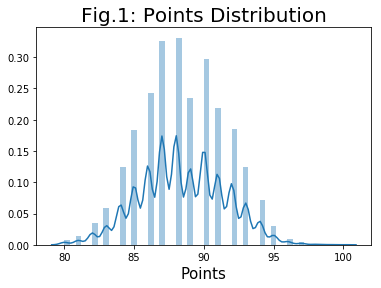

In [8]:
# Disttribution of points for initial dataset
sns.distplot(wine_data.points) 
plt.xlabel("Points",size=15)
plt.title("Fig.1: Points Distribution", size=20)

Text(0.5,1,'Fig. 2: Wine Tasters and the Amount of Wines Evaluated')

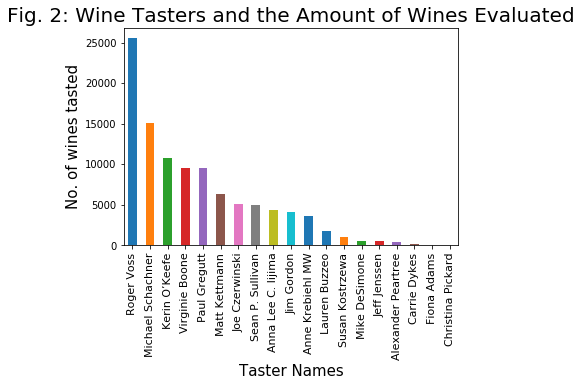

In [9]:
# Wine Tasters and the Amount of Wines Evaluated
wine_data['taster_name'].value_counts().plot(kind='bar')
plt.xticks(fontsize=11)
plt.xlabel("Taster Names",size=15)
plt.ylabel('No. of wines tasted', size=15)
plt.title("Fig. 2: Wine Tasters and the Amount of Wines Evaluated", size=20)

### Sample Dataset (i.e. wines evaluated by Roger Voss)

In [10]:
# Selecting sample of the data that will be used (i.e. the wines evaluated by Roger Voss)
wine_data = wine_data[(wine_data['taster_name']=='Roger Voss') | (wine_data['taster_twitter_handle']=='@vossroger')]
print("Wine Data Sample Dimension:",wine_data.shape,"(i.e. Wines evaluated by Roger Voss)") #dataset dimension
wine_data.head()

Wine Data Sample Dimension: (25514, 14) (i.e. Wines evaluated by Roger Voss)


,serial,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone


In [11]:
# Measures of the numerical data (i.e. wines tasted by Roger Voss)
wine_data.describe()

,serial,points,price
count,25514.000000,25514.000000,20172.000000
mean,64480.295524,88.708003,38.649960
std,37486.514606,3.036373,71.540473
min,1.000000,80.000000,5.000000
25%,32051.250000,86.000000,15.000000
50%,63917.500000,88.000000,22.000000
75%,96872.750000,91.000000,40.000000
max,129970.000000,100.000000,3300.000000


In [12]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25514 entries, 1 to 129970
Data columns (total 14 columns):
serial                   25514 non-null int64
country                  25512 non-null object
description              25514 non-null object
designation              17963 non-null object
points                   25514 non-null int64
price                    20172 non-null float64
province                 25512 non-null object
region_1                 18635 non-null object
region_2                 2 non-null object
taster_name              25514 non-null object
taster_twitter_handle    25514 non-null object
title                    25514 non-null object
variety                  25514 non-null object
winery                   25514 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 2.9+ MB


Text(0.5,1,'Fig.3: Points Distribution for Wines Evaluated by Roger Voss ')

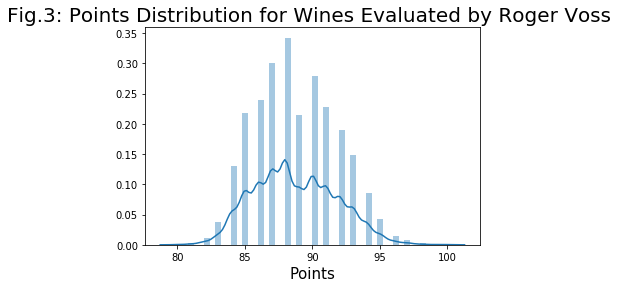

In [13]:
# Distribution of points for wines Roger Voss evaluated
sns.distplot(wine_data.points) 
plt.xlabel("Points",size=15)
plt.title("Fig.3: Points Distribution for Wines Evaluated by Roger Voss ", size=20)

Text(0.5,0.98,'Fig.4: Countries per bottle of Wine Evaluted by Roger Voss ')

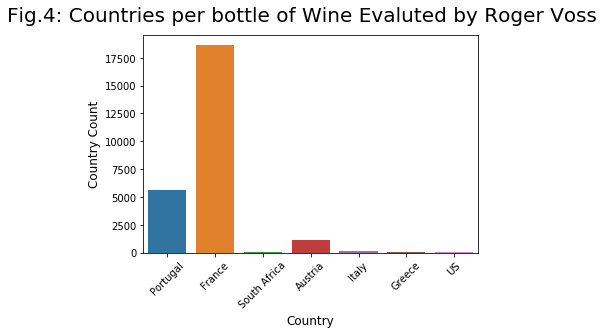

In [14]:
sns.countplot(x='country',data=wine_data, orient="h")
plt.ylabel('Country Count',size=12)
plt.xlabel("Country",size=12)
plt.xticks(rotation=45)
plt.suptitle("Fig.4: Countries per bottle of Wine Evaluted by Roger Voss ", size=20)

## Preprocessing of Data

In [15]:
# Rename column 'serial' to 'wine_id'
wine_data.rename(columns={'serial':'wine_Id'}, inplace=True)
wine_data.head(1)

,wine_Id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [16]:
#check for duplicates in dataset and remove if any
print(wine_data.duplicated(subset=None, keep='first').sum(),"duplicate record(s)")

0 duplicate record(s)


In [17]:
# Perform feature extraction to impute the year of each wine
wine_data['year'] = wine_data['title'].str.extract('(\d\d\d\d)', expand=True)

In [18]:
# Check to see if there are any null years
wine_data['year'].isnull().value_counts()

False    23867
True      1647
Name: year, dtype: int64

In [19]:
# wines that does not have a year in the title
#Wines without a year are classified as Non-Vintage wines
wine_data.title[wine_data['year'].isnull()].head()

63       Roland Champion NV Brut Rosé  (Champagne)
69                Collet NV Brut Rosé  (Champagne)
334    Jacquart NV Mosaïque Rosé Brut  (Champagne)
406         Jacquart NV Brut Mosaïque  (Champagne)
450             Montaudon NV Classe M  (Champagne)
Name: title, dtype: object

In [20]:
# convert year to int so as to make searches for preprocessing easier
wine_data.year = pd.to_numeric(wine_data.year, errors='coerce').fillna(0).astype(np.int64)

In [21]:
# check fo erroneous years (NB: its year 2018, any year above this is invalid)
print((wine_data['year']>2018).sum(),"invalid year(s)")

0 invalid year(s)


In [22]:
# Applying feature engineering to create type of wine (Vintage/n\Non-Vintage)
wine_data['type']= None
wine_data.type[wine_data['year']!=0] = 'Vintage'
wine_data.type[wine_data['year']==0] = 'Non-Vintage'

In [23]:
# Create loation by feature extraction from title
no_location = wine_data['title'].str.split('(', expand=True, n=1)
#wine_data['location'] = no_location.str.extract('(', expand=True)
#wine_data
no_location=no_location[1].str.split(')', expand=True, n=1)
wine_data['location']=no_location[0]

#wine_data[wine_data['location'].isnull()==True]

In [24]:
# impute location from region_2,region_1,province 
wine_data['location'].fillna(wine_data.region_2, inplace = True) 
wine_data['location'].fillna(wine_data.region_1, inplace = True)
wine_data['location'].fillna(wine_data.province, inplace = True)

In [25]:
# look for missing locations and country
print(wine_data['location'].isnull().sum(),"missing location(s) and",wine_data['country'].isnull().sum(),"missing countries") #check for null locations

#impute missing missing location and country from title research
wine_data.location.fillna('Bordeaux',inplace=True)
wine_data.country.fillna('France',inplace=True)

print("are attributed to 'Bordeaux' region in 'France' based on research of wine titles")

2 missing location(s) and 2 missing countries
are attributed to 'Bordeaux' region in 'France' based on research of wine titles


In [26]:
# look for missing prices
print(wine_data['price'].isnull().sum(),"missing price(s)") #check for null prices

#impute missing prices with the median price
wine_data.price.fillna(wine_data['price'].median(),inplace=True)
print("imputed from median price")

5342 missing price(s)
imputed from median price


In [27]:
# Drop columns that are not needed
wine_data_2 = wine_data.drop(['designation','region_1','region_2','taster_twitter_handle','description','province','taster_name'],axis=1)
wine_data_2.head()

,wine_Id,country,points,price,title,variety,winery,year,type,location
1,1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,Vintage,Douro
7,7,France,87,24.0,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,Vintage,Alsace
9,9,France,87,27.0,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,Vintage,Alsace
11,11,France,87,30.0,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,2012,Vintage,Alsace
30,30,France,86,22.0,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone,2012,Vintage,Beaujolais-Villages


In [28]:
wine_data_2.info() # confirm that there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25514 entries, 1 to 129970
Data columns (total 10 columns):
wine_Id     25514 non-null int64
country     25514 non-null object
points      25514 non-null int64
price       25514 non-null float64
title       25514 non-null object
variety     25514 non-null object
winery      25514 non-null object
year        25514 non-null int64
type        25514 non-null object
location    25514 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ MB


## Transformation of Data

In [29]:
# Transformation
# Label encoder transforms nominal features into numerical labels which algorithms can make sense of
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    
    for column in df.columns:
        if not np.issubdtype(df[column].dtype, np.number) and column != 'year':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [30]:

label_encoders = create_label_encoder_dict(wine_data_2)
#print("Encoded Values for each Label")
#print("="*32)
#for column in label_encoders:
 #   print("="*32)
 #   print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
  #  print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)
    

In [31]:
### Apply each encoder to the data set to obtain transformed values
wd3 = wine_data_2.copy() # create copy of initial data set
for column in wd3.columns:
    if column in label_encoders:
        wd3[column] = label_encoders[column].transform(wd3[column])

print("Transformed data set")
print("="*32)
wd3.head()


Transformed data set


,wine_Id,country,points,price,title,variety,winery,year,type,location
1,1,4,87,15.0,20538,134,3685,2011,1,160
7,7,1,87,24.0,21846,68,3850,2012,1,7
9,9,1,87,27.0,15505,129,3059,2012,1,7
11,11,1,87,30.0,16724,68,3207,2012,1,7
30,30,1,86,22.0,12164,64,2629,2012,1,24


## Mining of Data

In [32]:
# Function to do K-Fold Cross Validation
def cross_validate(x,y,kf_split):
    from sklearn.model_selection import KFold
    
    #K-Fold Cross Validation
    kf =KFold(n_splits=kf_split,shuffle=True,random_state=1)
    
    for train_index, test_index in kf.split(x):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    return [X_train,y_train,X_test,y_test]


#### ====JUSTIFICATION OF USE====

A cross validataion was done to help reduce the liklihood of selection bias and overfitting
and to give insights as to how the predictive models will generalise to an unknown dataset.

Apart from popularity, there is no specific reason for choosing the K-Fold Cross Validation.


In [33]:
# Algorithms without Hyper Parameter Tuning
def pred_techniques(x,y,kf_split): 
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neural_network import MLPRegressor

    train_test = cross_validate(x,y,kf_split) #perform kfold cross validation

    # Decision Tree Regressor
    reg = DecisionTreeRegressor(random_state=1) 
    reg.fit(train_test[0], train_test[1])
    
    
    # Multi-Layer Perceptron Regressor
    clf = MLPRegressor(solver='adam', alpha=1e-5, activation='relu',learning_rate_init =0.01,shuffle=True,
                    hidden_layer_sizes=(7, 4),random_state=1)
    clf.fit(train_test[0],train_test[1])
    

    return [reg,clf,train_test[2],train_test[3],train_test[0],train_test[1]]

In [34]:
# separate data into dependent (Y) and independent(X) variables
feature_cols =  ['variety','winery','location', 'year']
x_data = wd3[feature_cols]
y_data = wd3['points']

l = pred_techniques(x_data,y_data,100)
print("Fig.5: Feature Significance") 
pd.DataFrame([ "%.2f%%" % perc for perc in (l[0].feature_importances_ * 100) ], index = x_data.columns, columns = ['Feature Significance in Decision Tree'])    

Fig.5: Feature Significance


,Feature Significance in Decision Tree
variety,17.31%
winery,34.28%
location,31.78%
year,16.63%


## Interpretation/Evaluation

In [35]:
# Accuracy Test Scores of both techniques 
r2_tree = l[0].score(l[2],l[3])
r2_nn = l[1].score(l[2],l[3])

print("Decision Tree Regressor")
print("="*32)
print("R Square:",r2_tree )


print("\nMulti-Layer Perceptron Regressor")
print("="*32)
print("R Square:",r2_nn)


Decision Tree Regressor
R Square: 0.2782758795086844

Multi-Layer Perceptron Regressor
R Square: 0.02065691899668376


In [36]:
# Actual points and Predicted points by both models plus 4 predictor variables on left
results= l[2].copy()
results['Actual Points']=l[3]
pred_tree=l[0].predict(l[2])
pred_mlp=l[1].predict(l[2])
results['Dec_Tree_Reg']=pred_tree
results['MLP_Regressor']=pred_mlp
print("Fig.6: Actual Points and Predicted Points yielded from both Models")
results.head()


Fig.6: Actual Points and Predicted Points yielded from both Models


,variety,winery,location,year,Actual Points,Dec_Tree_Reg,MLP_Regressor
96,64,2977,324,2015,88,87.0,88.700308
151,137,2980,1,2014,91,90.0,87.549230
887,137,3346,160,2009,90,87.0,88.542322
1339,153,2314,113,2016,90,88.0,88.596324
1377,137,3640,160,2007,86,83.0,88.389821


In [37]:
# Calculate Variance in both models
mse_treg = mean_squared_error(l[3],pred_tree)
mse_nn = mean_squared_error(l[3],pred_mlp)

# Calculate Standard Deviation in both models
rmse_treg = math.sqrt(mean_squared_error(l[3],pred_tree))
rmse_nn = math.sqrt(mean_squared_error(l[3],pred_mlp))

# Calcualte Mean Absolute Error in both models
mae_treg = mean_absolute_error(l[3],pred_tree)
mae_nn = mean_absolute_error(l[3],pred_mlp)

# Print evaluation metrics of both models
print("Decision Tree Regressor")
print("="*32)
print("MSE:",mse_treg)
print("RMSE:",rmse_treg)
print("MAE:",mae_treg)

print("\nMulti-Layer Perceptron Regressor")
print("="*32)
print("MSE:",mse_nn)
print("RMSE:",rmse_nn)
print("MAE:",mae_nn)

Decision Tree Regressor
MSE: 6.511155827763204
RMSE: 2.551696656690055
MAE: 1.7793059446000625

Multi-Layer Perceptron Regressor
MSE: 8.83530871174624
RMSE: 2.9724247192731794
MAE: 2.4461136997748896


In [38]:
print("Decision Tree Number of Perfect Predictions:")
results[results['Dec_Tree_Reg']==results['Actual Points']].Dec_Tree_Reg.count()

Decision Tree Number of Perfect Predictions:


62

In [39]:
print("Neural Network Number of Perfect Predictions:")
results[results['MLP_Regressor']==results['Actual Points']].MLP_Regressor.count()

Neural Network Number of Perfect Predictions:


0

Text(0.5,1,'Fig.7: Actual Points vs Decision Tree Predicted Points')

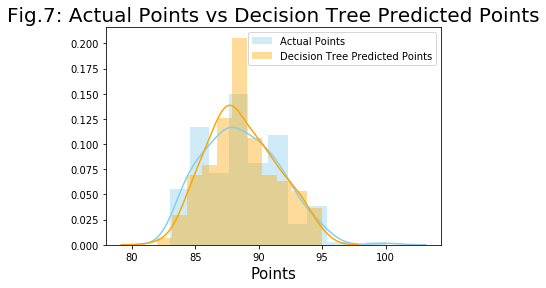

In [40]:
sns.distplot( results["Actual Points"] , color="skyblue", label="Actual Points")
sns.distplot( results["Dec_Tree_Reg"] , color="orange", label="Decision Tree Predicted Points")
plt.legend()
plt.xlabel("Points",size=15)
plt.title("Fig.7: Actual Points vs Decision Tree Predicted Points", size=20)

Text(0.5,1,'Fig.8: Actual Points vs Neural Network Predicted Points')

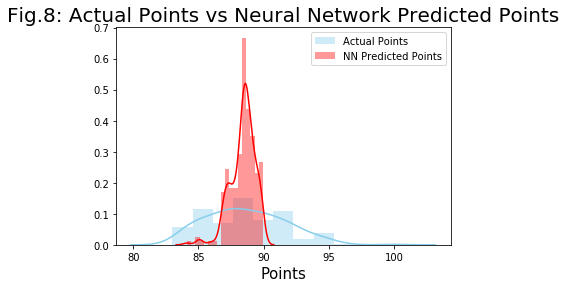

In [41]:
sns.distplot( results["Actual Points"] , color="skyblue", label="Actual Points")
sns.distplot( results["MLP_Regressor"] , color="red", label="NN Predicted Points")
plt.legend()
plt.xlabel("Points",size=15)
plt.title("Fig.8: Actual Points vs Neural Network Predicted Points", size=20)

In [42]:
print("Fig.9: Summary of Evaluation Metrics")
pd.DataFrame(dict(R_Square= [r2_tree,r2_nn],
                  MSE=[mse_treg,mse_nn], RMSE=[rmse_treg,rmse_nn],MAE=[mae_treg,mae_nn]),
                index=['Dec Tree Reg','MLP Reg'])


Fig.9: Summary of Evaluation Metrics


,R_Square,MSE,RMSE,MAE
Dec Tree Reg,0.278276,6.511156,2.551697,1.779306
MLP Reg,0.020657,8.835309,2.972425,2.446114



The two techniques used to predict the points Roger Voss would give a wine are Decision Tree Regressor (DTR) and Multi-Layer Perceptron Regressor (MLPR).  Both techniques were used because the response variable (points) is of numeric datatype and both are able to do multiple regression.

Decision Tree

The Decision Tree Algorithm builds a tree like structure as a model which uses a top-down, greedy search through the space of possible branches with no backtracking.  The model breaks down the dataset into smaller and smaller subsets while the associated decision tree is created incrementally. The Decision Tree algorithm is simple to understand and interpret, has value even with little hard data, helps determine worst, best and expected values for different scenarios and can be combined with other decision techniques.

Multi-Layer Perceptron (MLP) 

The Multi-Layer Perceptron is the sum of several perceptions together. The input layer reads in the data and the output layer creates the resulting output. The Multi-Layer Perceptron model trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. The Multi-Layer Perceptron uses a parameter alpha for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes. The Multi-layer Perceptron algorithm is capable of learning non-linear models in real-time and requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations. Multi-Layer Perception algorithm is also sensitive to feature scaling.


 The Decision Tree Regressor outperformed the MLP regressor  in this experiment. The R2 score  or "coefficient of determination" which depicts how well the data fits the model had a value of 0.278 for the Decision Tree Regressor and 0.020657 for the MLP Regressor.  These values are relatively low which suggest that the models did not fit the data very well. However, the standard deviations or "RMSE" of both models were relatively low.  This is an indication that the observations are not spread out but rather closer to the actual points which further suggests that the model did not perform as bad.  The Decision Tree Regressor had a standard deviation of 2.551697 and the MLP Regressor had a standard deviation of 2.972425. 

In [43]:
results.describe()

,variety,winery,location,year,Actual Points,Dec_Tree_Reg,MLP_Regressor
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,91.368627,2182.156863,179.996078,1893.298039,88.643137,88.693374,88.400031
std,54.955865,1275.142403,126.903103,474.266235,3.009516,2.712218,0.940336
min,7.000000,5.000000,1.000000,0.000000,83.000000,82.000000,84.122321
25%,43.000000,1212.000000,64.000000,2009.000000,86.000000,87.000000,87.932542
50%,86.000000,2427.000000,160.000000,2012.000000,88.000000,88.000000,88.522811
75%,137.000000,3252.000000,294.000000,2014.000000,91.000000,90.875000,88.997543
max,215.000000,4006.000000,417.000000,2016.000000,100.000000,95.000000,89.940443


## Conclusion

The wine retailer is now able to know what wines to purchase and where to purchase them.

## References

Attending a Wine Tasting Event - dummies. (2018). Retrieved from https://www.dummies.com/food-drink/drinks/wine/attending-a-wine-tasting-event/

Metadata 
https://www.kaggle.com/zynicide/wine-reviews

The Different Types of Wine (Infographic) | Wine Folly. (2018). Retrieved from https://winefolly.com/review/different-types-of-wine/

## Appendices

Text(0.5,1,'Fig.10: Correlation between Price and Points')

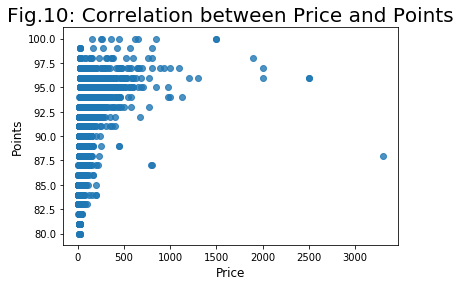

In [44]:
sns.regplot(x="price", y="points", data=wine_data, fit_reg = False)
plt.xlabel("Price",size=12)
plt.ylabel("Points",size=12)
plt.title("Fig.10: Correlation between Price and Points",size=20)

Text(0,0.5,'')

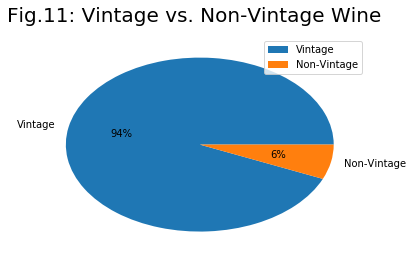

In [45]:
# Coverage of Vintage vs. Non-Vintage
wine_data['type'].value_counts().plot(kind="pie",autopct='%1.0f%%')
labels = 'Vintage', 'Non-Vintage'
plt.legend(labels)
plt.suptitle("Fig.11: Vintage vs. Non-Vintage Wine", size=20)
plt.ylabel('')

Text(0.5,1,'Fig.12: Non-Vintage Wine Points Distribution  ')

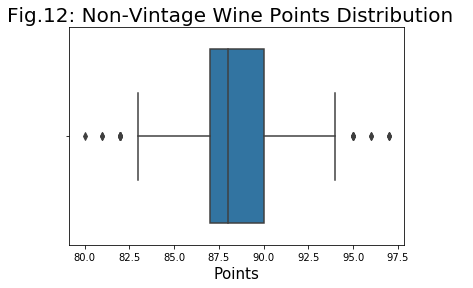

In [46]:
# Non-Vintage Wine Points Distribution
#wine_data[wine_data['year']== 0]
no_year= wine_data[wine_data['year']==0]
sns.boxplot(x=no_year.points)
plt.xlabel("Points",size=15)
plt.title("Fig.12: Non-Vintage Wine Points Distribution  ", size=20)

Text(0.5,1,'Fig.13: Correlation between Transformed Data Columns ')

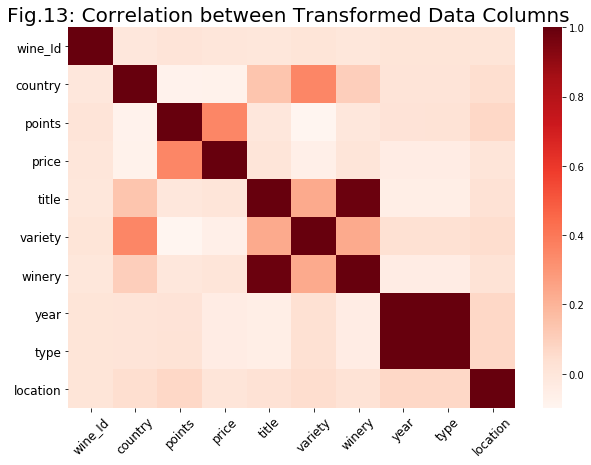

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(wd3.corr(),cmap=plt.cm.Reds,)
plt.xticks(size=12,rotation=45)
plt.yticks(size=12)
plt.title('Fig.13: Correlation between Transformed Data Columns ',size=20)